In [18]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [19]:
tk = th.Thicket.from_caliperreader(glob("../weak_scale/*.cali"))

(1/2) Reading Files:   0%|          | 0/20 [00:00<?, ?it/s]

(2/2) Creating Thicket: 100%|██████████| 19/19 [00:00<00:00, 799.21it/s]
/home/alex/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [20]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
597140875,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a65536-ssample-isorted.cali,true,true,true,true,1729582553,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 65536, sample, sorted]",c,sample,mpi,int,4,65536,sorted,2,8,online,strong
659510878,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a262144-ssample-isorted.cali,true,true,true,true,1729584432,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 262144, sample, sorted]",c,sample,mpi,int,4,262144,sorted,8,8,online,strong
794613659,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a1048576-ssample-isorted.cali,true,true,true,true,1729584548,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, sample, sorted]",c,sample,mpi,int,4,1048576,sorted,32,8,online,strong
903943707,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a262144-ssample-i1perturbed.cali,true,true,true,true,1729584483,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 262144, sample, 1perturbed]",c,sample,mpi,int,4,262144,1perturbed,8,8,online,strong
918256160,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a65536-ssample-i1perturbed.cali,true,true,true,true,1729582553,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 65536, sample, 1perturbed]",c,sample,mpi,int,4,65536,1perturbed,2,8,online,strong


In [21]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.410 main
├─ 0.001 MPI_Comm_dup
├─ 0.008 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.001 comm
│  ├─ 0.000 comm_large
│  │  ├─ 0.000 MPI_Alltoall
│  │  ├─ 0.000 MPI_Alltoallv
│  │  ├─ 0.000 MPI_Gather
│  │  ├─ 0.000 MPI_Gatherv
│  │  └─ 0.000 MPI_Scatter
│  └─ 0.000 comm_small
│     └─ 0.000 MPI_Bcast
├─ 0.015 comp
│  ├─ 0.014 comp_large
│  └─ 0.000 comp_small
├─ 0.001 correctness_check
└─ 0.001 data_init_runtime
   └─ 0.000 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.41 indices: {'profile': 597140875})
█ 0.37 - 0.41
█ 0.29 - 0.37
█ 0.21 - 0.29
█ 0.12 - 0.21
█ 0.04 - 0.12
█ 0.00 - 0.04

name User code    ◀  Only in left graph    ▶  Only in right graph



In [22]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",597140875,1.0,regionprofile,0.409804,0.410397,0.410100,0.820201,0.000000,0.382092,0.385828,0.383960,0.767920,NaN,NaN,NaN,NaN,main,2,sorted,65536
1,"{'name': 'main', 'type': 'function'}",659510878,1.0,regionprofile,0.515263,0.518518,0.517444,4.139550,0.000001,0.466206,0.471041,0.468374,3.746992,NaN,NaN,NaN,NaN,main,8,sorted,262144
2,"{'name': 'main', 'type': 'function'}",794613659,1.0,regionprofile,1.692176,1.708972,1.697774,54.328756,0.000028,1.580923,1.605041,1.592622,50.963892,NaN,NaN,NaN,NaN,main,32,sorted,1048576
3,"{'name': 'main', 'type': 'function'}",903943707,1.0,regionprofile,0.524245,0.526297,0.525497,4.203976,0.000001,0.456417,0.462356,0.460760,3.686082,NaN,NaN,NaN,NaN,main,8,1perturbed,262144
4,"{'name': 'main', 'type': 'function'}",918256160,1.0,regionprofile,0.449364,0.449967,0.449665,0.899331,0.000000,0.382574,0.387887,0.385230,0.770461,NaN,NaN,NaN,NaN,main,2,1perturbed,65536


In [23]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

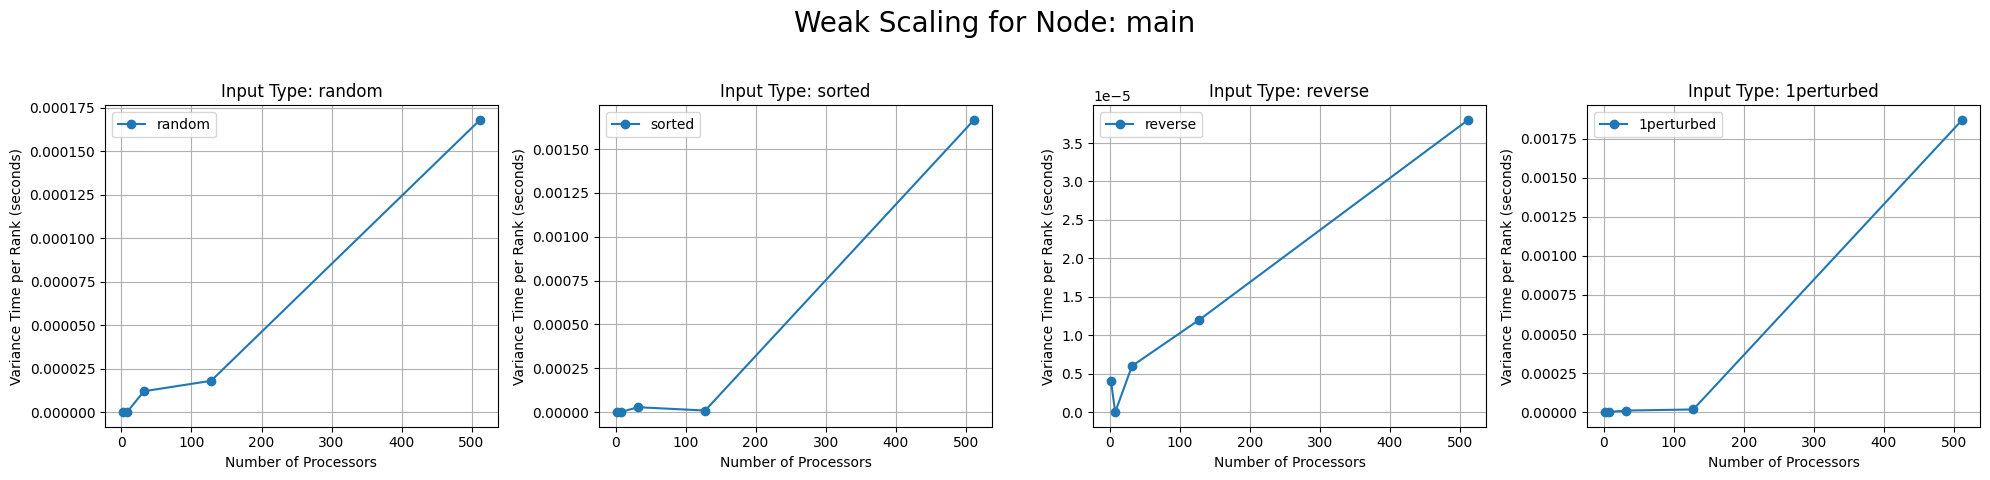

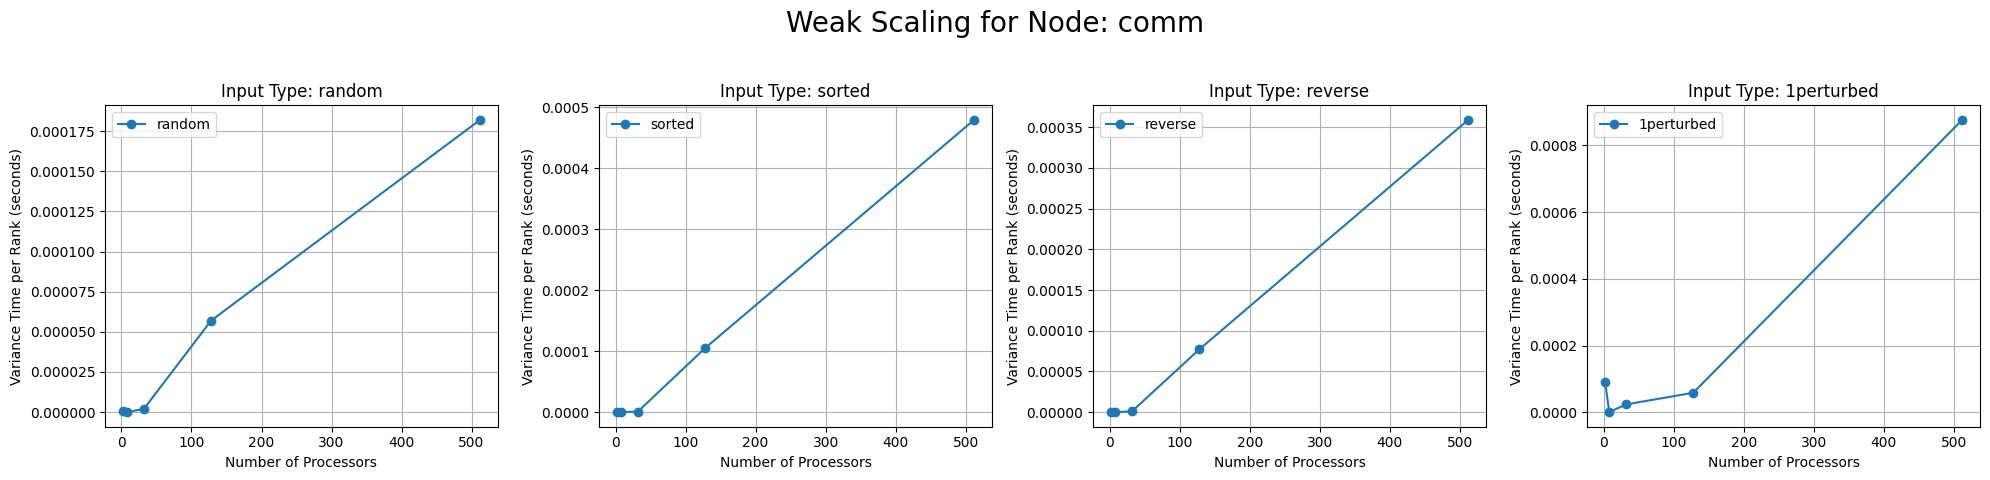

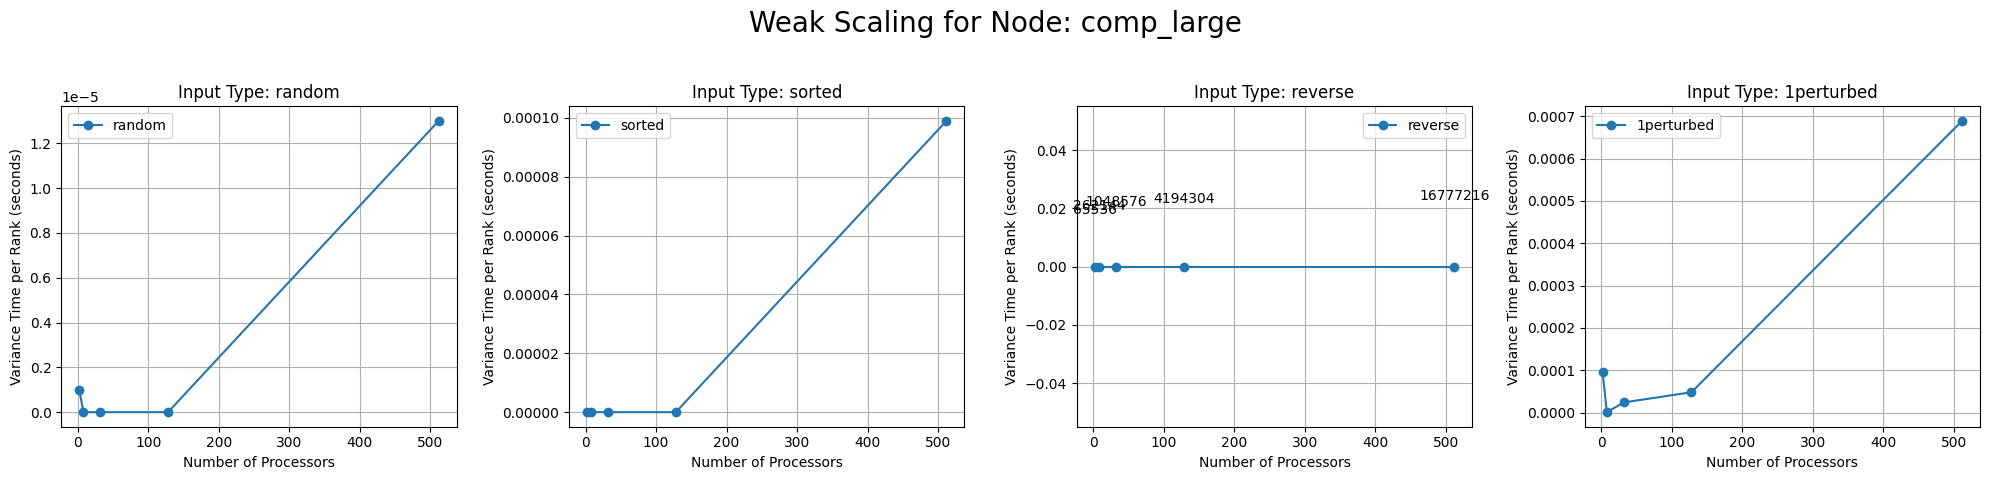

In [30]:
import os

input_sizes = [65536, 262144, 1048576, 4194304, 16777216]
input_types = ["random", "sorted", "reverse", "1perturbed"]

xlabels = ["Min Time per Rank (seconds)", "Max Time per Rank (seconds)", "Avg Time per Rank (seconds)", "Total Time per Rank (seconds)", "Variance Time per Rank (seconds)"]
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 4

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_weak_scaling(tk, input_types):
    target_nodes = ['comp_large', 'comm', 'main']  # Specify target nodes
    
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name not in target_nodes:
            continue  # Skip nodes that are not in the target list

        # Create a figure with a 4x2 grid of subplots
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        axs = axs.flatten()  # Flatten the array to 1D for easier indexing

        for idx, input_type in enumerate(input_types):
            if idx >= 8:
                print(f"Warning: More input types than subplots available. Input type {input_type} will not be plotted.")
                break  # Prevent indexing beyond the available subplots

            ax = axs[idx]  # Select the appropriate subplot

            # Filter the dataframe for the current node and input_type
            data = tk.dataframe[
                (tk.dataframe["input_type"] == input_type) &
                (tk.dataframe['node'] == node)
            ]
            
            if data.empty:
                print(f"No data found for input_type={input_type}, node={node_name}. Skipping.")
                continue  # Skip if no data is available

            # Sort data by number of processors to ensure proper plotting
            data = data.sort_values(by="num_procs")

            # Plot the data
            ax.plot(
                data["num_procs"],
                data[time_types[type_selector]],
                marker='o',
                label=input_type
            )

            # Annotate each data point with the input size
            for i, row in data.iterrows():
                ax.annotate(
                    f'{int(row["input_size"])}',
                    (row["num_procs"], row["Avg time/rank"]),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center'
                )

            # Set subplot title and labels
            ax.set_title(f'Input Type: {input_type}')
            ax.set_xlabel('Number of Processors')
            ax.set_ylabel(xlabels[type_selector])
            ax.legend()
            ax.grid(True)

        # Hide any unused subplots (if we have fewer than 8 input types)
        if len(input_types) < len(axs):
            for j in range(len(input_types), len(axs)):
                fig.delaxes(axs[j])

        # Set the main title for the figure
        fig.suptitle(f'Weak Scaling for Node: {node_name}', fontsize=20)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the main title

        # Show the plot

        # Save plot to file
        filename = f'weakscaling_{file_output_label[type_selector]}_{node_name}.png'
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, format='png', dpi=300)

        plt.show()

# def plot_weak_scaling(tk, input_types):
#     for node in tk.graph.traverse():
#         node_name = node.frame['name']
#         if node_name in ('comp_large', 'comm', 'main'):
#             for input_type in input_types:
#                 fig, ax = plt.subplots(figsize=(10, 6))
#                 data = tk.dataframe[(tk.dataframe["input_type"] == input_type) & (tk.dataframe['node'] == node)]
#                 data = data.sort_values("num_procs")
#                 ax.plot(
#                     data["num_procs"],
#                     data["Avg time/rank"],
#                     marker='o',
#                     linestyle='-',
#                     label=f'{input_type}'
#                 )
#                 # Annotate each data point with the array size
#                 for i, row in data.iterrows():
#                     ax.annotate(
#                         f'{int(row["input_size"])}',
#                         (row["num_procs"], row["Avg time/rank"]),
#                         textcoords="offset points",
#                         xytext=(0,10),
#                         ha='center'
#                     )
#                 ax.set_title(f'Weak Scaling for {input_type} on {node_name}')
#                 ax.set_xlabel('Number of Processors')
#                 ax.set_ylabel('Average Time per Rank (seconds)')
#                 ax.legend()
#                 plt.show()

plot_weak_scaling(tk, input_types)

In [25]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

,index,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,0,"{'name': 'main', 'type': 'function'}",597140875,1.0,regionprofile,0.409804,0.410397,0.410100,0.820201,0.000000,0.382092,0.385828,0.383960,0.767920,NaN,NaN,NaN,NaN,main,2,sorted,65536
1,1,"{'name': 'main', 'type': 'function'}",659510878,1.0,regionprofile,0.515263,0.518518,0.517444,4.139550,0.000001,0.466206,0.471041,0.468374,3.746992,NaN,NaN,NaN,NaN,main,8,sorted,262144
2,2,"{'name': 'main', 'type': 'function'}",794613659,1.0,regionprofile,1.692176,1.708972,1.697774,54.328756,0.000028,1.580923,1.605041,1.592622,50.963892,NaN,NaN,NaN,NaN,main,32,sorted,1048576
3,3,"{'name': 'main', 'type': 'function'}",903943707,1.0,regionprofile,0.524245,0.526297,0.525497,4.203976,0.000001,0.456417,0.462356,0.460760,3.686082,NaN,NaN,NaN,NaN,main,8,1perturbed,262144
4,4,"{'name': 'main', 'type': 'function'}",918256160,1.0,regionprofile,0.449364,0.449967,0.449665,0.899331,0.000000,0.382574,0.387887,0.385230,0.770461,NaN,NaN,NaN,NaN,main,2,1perturbed,65536
5,5,"{'name': 'main', 'type': 'function'}",924180576,1.0,regionprofile,0.531032,0.531088,0.531075,4.248596,0.000000,0.469810,0.474710,0.473480,3.787840,NaN,NaN,NaN,NaN,main,8,random,262144
6,6,"{'name': 'main', 'type': 'function'}",1504175327,1.0,regionprofile,1.846758,1.862570,1.853636,237.265348,0.000018,1.578377,1.651210,1.613874,206.575873,NaN,NaN,NaN,NaN,main,128,random,4194304
7,7,"{'name': 'main', 'type': 'function'}",1571601236,1.0,regionprofile,1.894397,1.911666,1.901724,243.420639,0.000017,1.605355,1.648466,1.626419,208.181635,NaN,NaN,NaN,NaN,main,128,1perturbed,4194304
8,8,"{'name': 'main', 'type': 'function'}",1899271269,1.0,regionprofile,2.678009,2.737025,2.712976,1389.043479,0.000168,1.767789,1.967588,1.853300,948.889588,NaN,NaN,NaN,NaN,main,512,random,16777216
9,9,"{'name': 'main', 'type': 'function'}",1935137930,1.0,regionprofile,1.742528,1.749762,1.746686,55.893952,0.000006,1.629747,1.642357,1.637646,52.404665,NaN,NaN,NaN,NaN,main,32,reverse,1048576
